# Longitudinal emittance

In [1]:
import sys
import os
from os.path import join
from pprint import pprint
import importlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
import h5py
from scipy import ndimage
import proplot as pplt

sys.path.append('..')
from tools import plotting as mplt
from tools import utils

In [2]:
pplt.rc['grid'] = False
pplt.rc['cmap.sequential'] = 'viridis'
pplt.rc['cmap.discrete'] = False

## Load data 

In [3]:
datadir = '../Diagnostics/Data/Measurements/2022-06-25/'
filenames = os.listdir(datadir)
filenames

['220625141259-longemittance.h5']

In [4]:
filename = '220625141259-longemittance.h5'
file = h5py.File(join(datadir, filename), 'r')
data = file['scandata']
pprint(data.dtype.fields)

mappingproxy({'cam08y': (dtype(('<f4', (512,))), 16),
              'int08': (dtype('<f8'), 2080),
              'iteration': (dtype('int64'), 8),
              'magnet_CurrentRb': (dtype('<f8'), 2088),
              'magnet_CurrentSet': (dtype('<f8'), 2096),
              'phase_Readback': (dtype('<f8'), 2104),
              'phase_Set': (dtype('<f8'), 2112),
              'sat08': (dtype('<f8'), 2072),
              'slowQ': (dtype('<f8'), 2064),
              'timestamp': (dtype('<f8'), 0)})


In [5]:
# Errors and warnings from log
for i in range(file['log'].size):
    if not(file['/log'][i, 'level'] == 'INFO'.encode('utf')):
        timestr = datetime.fromtimestamp(file['/log'][0, 'timestamp']).strftime("%m/%d/%Y, %H:%M:%S")
        print(f"{timestr} {file['log'][i, 'message']}")

# Configuration data
for key in file['/config'].keys():
    print(f"{key}")
    print("--------------")
    for name in file['/config'][key].dtype.names:
        print(f"{name}: {file['config'][key][name]}")
    print()

environment
--------------
timestamp: [1.65618078e+09]
user: [b'46h']
host: [b'btf-diag-app1.ics.sns.gov']
cmd_line: [b'emit2d/longitudinal-emittance.py']
work_dir: [b'/home/46h/btf-scripts']

metadata
--------------
timestamp: [1.65618079e+09]
Test_LLRF:FCM_RFQ1:CtlAmpSet: [0.63]
RFTF_TM:Gate_BeamOn:RR: [5.]
BTF_MEBT_Mag:PS_QH01:I_Set: [157.94000244]
BTF_MEBT_Mag:PS_QV02:I_Set: [280.05999756]
BTF_MEBT_Mag:PS_QH03:I_Set: [6.74547816]
BTF_MEBT_Mag:PS_QV04:I_Set: [-3.75051265]
BTF_MEBT_Mag:PS_QH05:I_Set: [0.]
BTF_MEBT_Mag:PS_QV06:I_Set: [-0.]
BTF_MEBT_Mag:PS_QV07:I_Set: [-3.0999999]
BTF_MEBT_Mag:PS_QH08:I_Set: [4.0999999]
BTF_MEBT_Mag:PS_QV09:I_Set: [-1.85000002]
BTF_MEBT_Mag:PS_QV10:I_Set: [-1.89999998]
BTF_MEBT_Mag:PS_QH11:I_Set: [7.19999981]
BTF_MEBT_Mag:PS_QV12:I_Set: [-6.55000019]
BTF_MEBT_Mag:PS_QH13:I_Set: [6.00035858]
BTF_MEBT_Mag:PS_QH33:I_Set: [5.0999999]
BTF_MEBT_Mag:PS_QV34:I_Set: [-5.30000019]
BTF_MEBT_Mag:PS_DCH01:I_Set: [4.69999981]
BTF_MEBT_Mag:PS_DCV01:I_Set: [-3.]
BTF_M

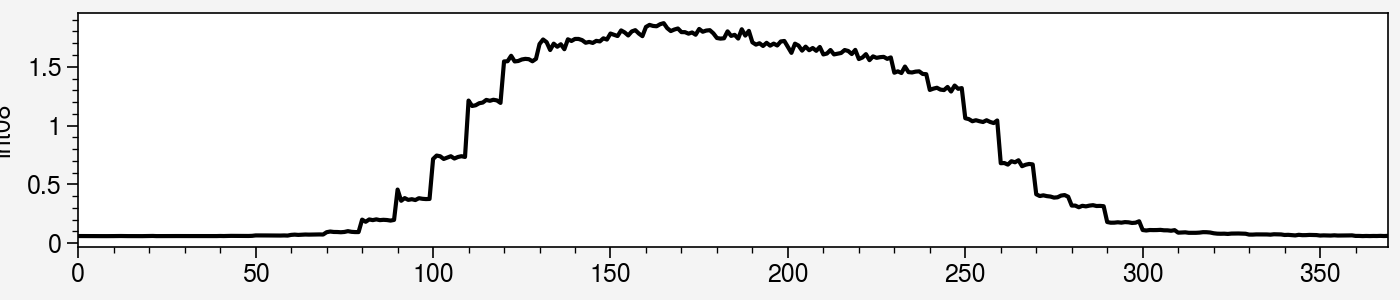

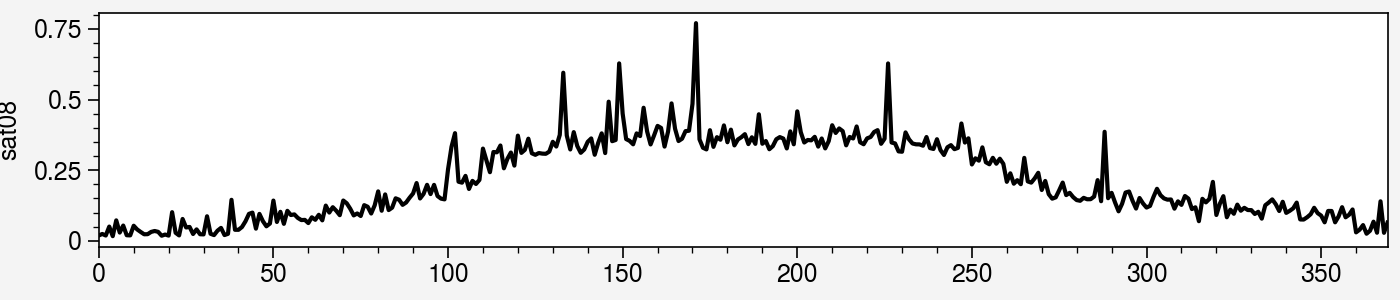

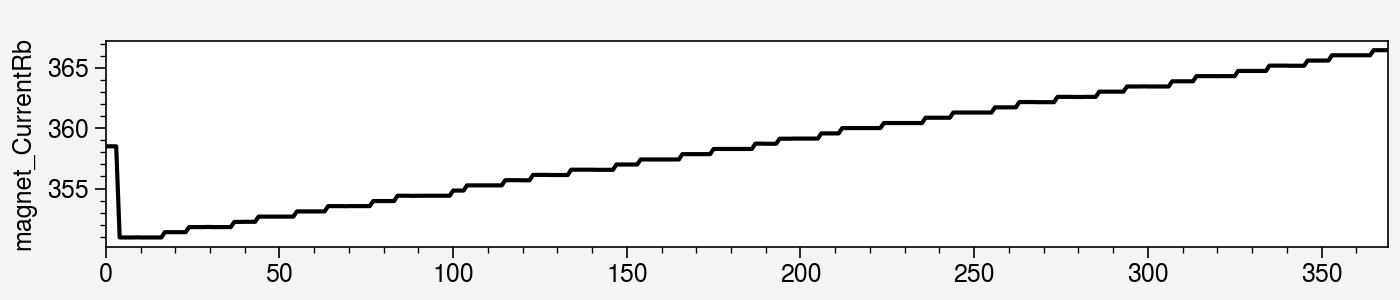

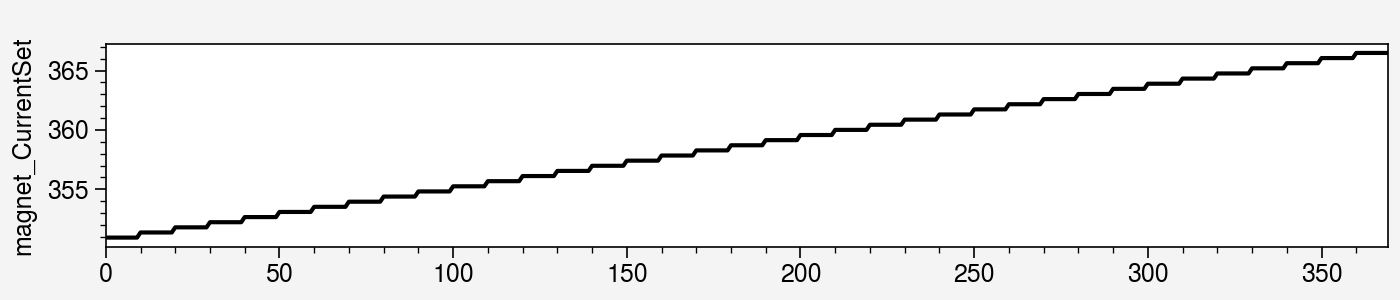

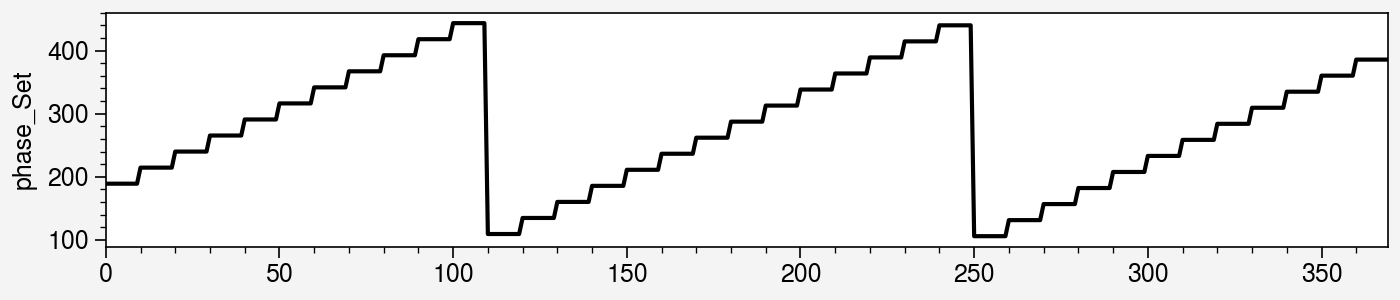

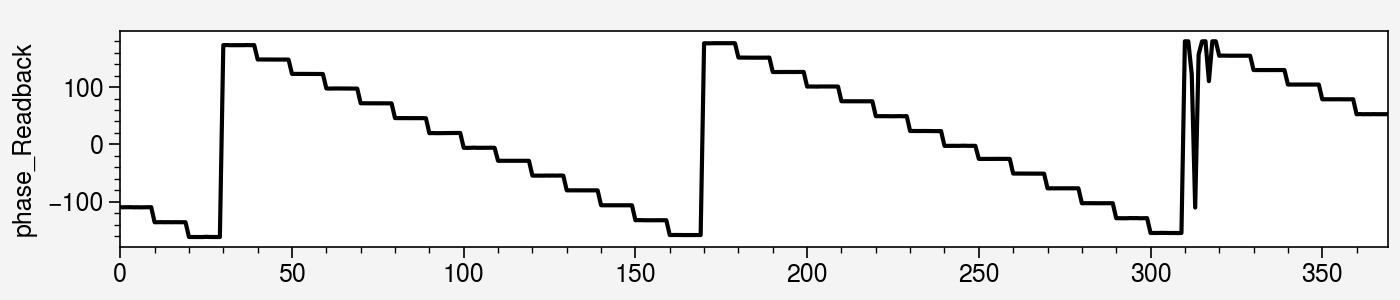

In [7]:
for name in ['int08', 'sat08', 'magnet_CurrentRb', 'magnet_CurrentSet', 
             'phase_Set', 'phase_Readback']:
    fig, ax = pplt.subplots(figsize=(7.0, 1.5))
    ax.plot(data[name], color='black')
    ax.format(ylabel=name)
    plt.show()

<a list of 1 Line2D objects>

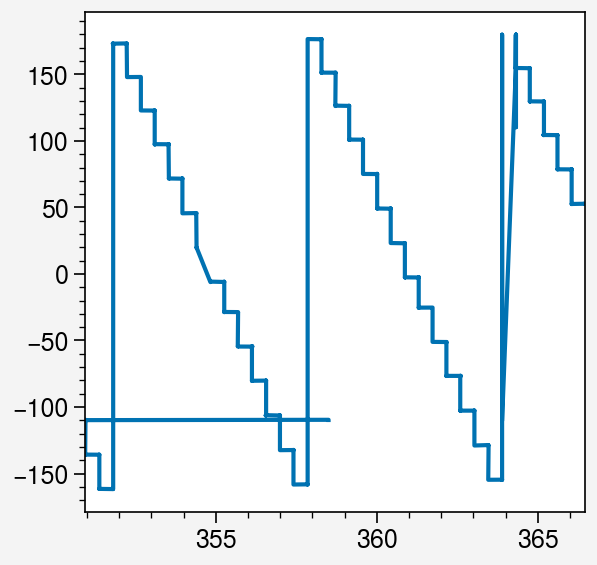

In [8]:
fig, ax = pplt.subplots()
ax.plot(data['magnet_CurrentRb'], data['phase_Readback'], )

<a list of 1 Line2D objects>

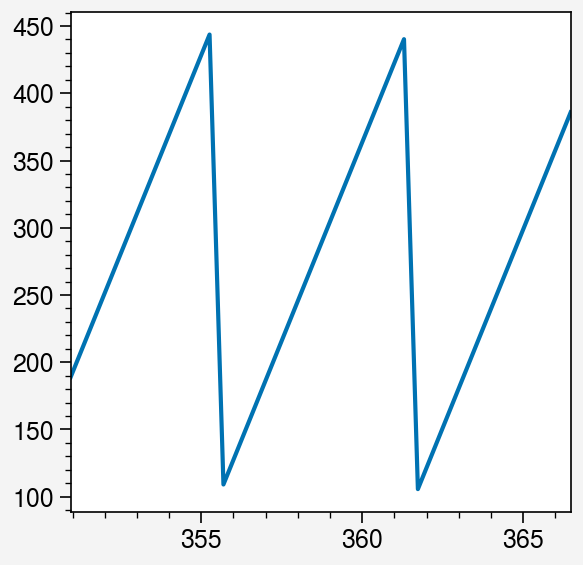

In [9]:
fig, ax = pplt.subplots()
ax.plot(data['magnet_CurrentSet'], data['phase_Set'], )

In [10]:
mag_sets = []  # dipole magnet setpoint
mag_rbs = []  # averaged dipole magnet readback
profiles = []  # averaged over pulses
for iteration in range(1, max(data['iteration'])):
    idx = data['iteration'] == iteration
    profile = np.mean(data[idx, 'cam08y'], axis=0)
    profiles.append(profile)
    mag_set = np.mean(data[idx, 'magnet_CurrentSet'], axis=0)
    mag_rb = np.mean(data[idx, 'magnet_CurrentRb'], axis=0)
    mag_sets.append(mag_set)
    mag_rbs.append(mag_rb)
profiles = np.array(profiles)
mag_sets = np.array(mag_sets)
mag_rbs = np.array(mag_rbs)

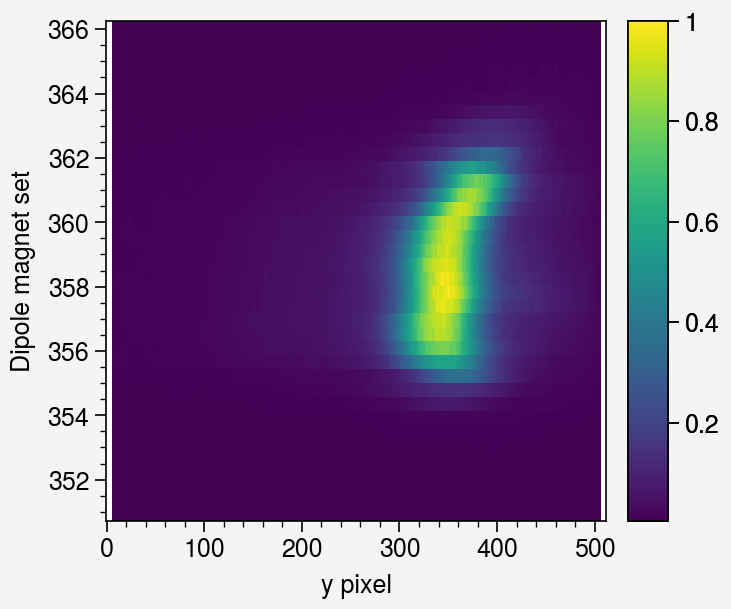

In [11]:
fig, ax = pplt.subplots(figsize=None)
ax.pcolormesh(np.arange(profiles.shape[1]), mag_sets, 
              np.ma.masked_less_equal(profiles / np.max(profiles), 0), 
              colorbar=True)
ax.format(ylabel='Dipole magnet set', xlabel='y pixel')
plt.show()

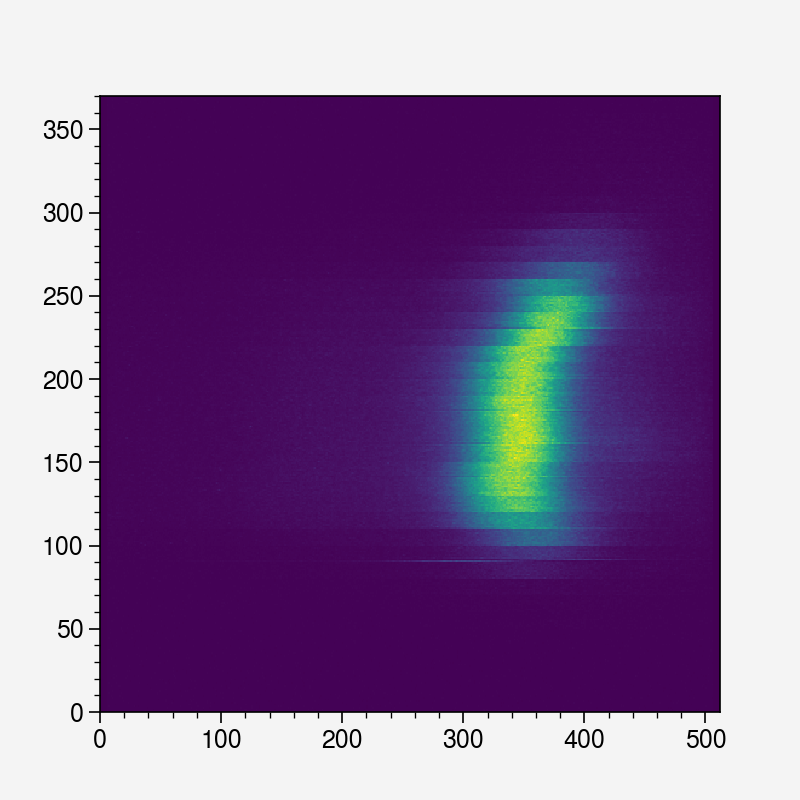

In [12]:
plt.pcolormesh(data['cam08y'])

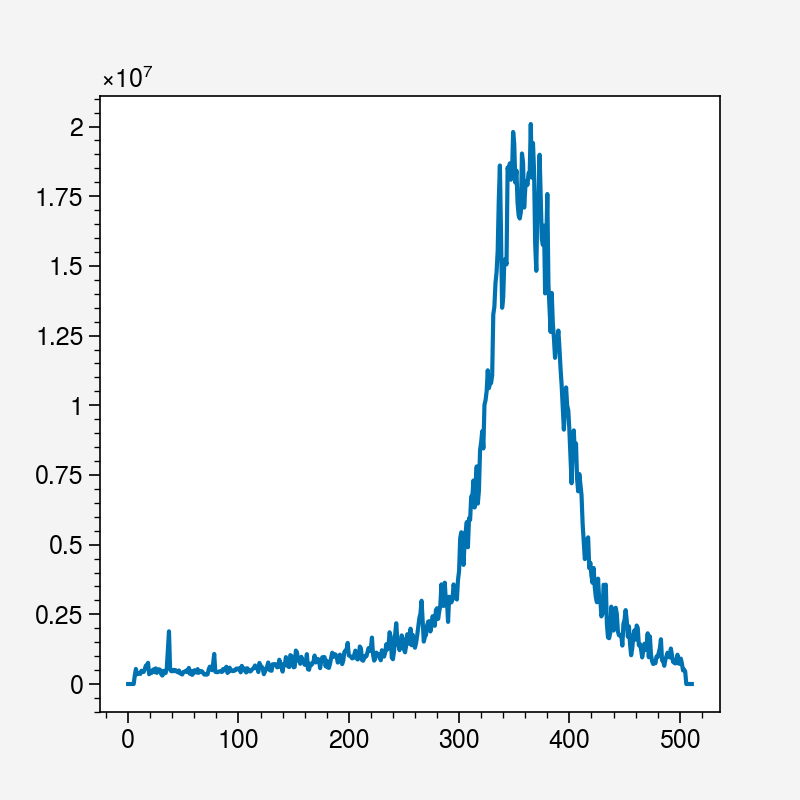

In [20]:
plt.plot(data['cam08y'][100, :])